In [1]:
# Standard imports
from pathlib import Path
import pandas as pd
import numpy as np

# Import our refactored modules
from athletes_brain.fig1 import (
    Fig1Config,
    AthletesBrainDataLoader,
    GroupComparison,
    BrainPlotter,
    generate_figure1,
)

# Import specific functions for focused analysis
from athletes_brain.fig1.main import analyze_specific_comparison, get_most_significant_regions

2025-09-09 13:53:40.297 | INFO     | athletes_brain.config:<module>:11 - PROJ_ROOT path is: /home/galkepler/Projects/athletes_brain


In [3]:
# Initialize configuration
config = Fig1Config()

# config.METRICS = ["gm_vol", "adc"]
# Set up matplotlib configuration for consistent plots
config.setup_matplotlib_config()

# Display configuration
print(f"Atlas: {config.ATLAS}")
print(f"Metrics: {config.METRICS}")
print(
    f"Group labels: {config.CLIMBER_GROUP_LABEL}, {config.BJJ_GROUP_LABEL}, {config.CONTROL_GROUP_LABEL}"
)
print(f"P-value threshold: {config.P_THRESHOLD}")
print(f"Visualization range: [{config.VMIN}, {config.VMAX}]")

Atlas: schaefer2018tian2020_400_7
Metrics: ['gm_vol', 'wm_vol', 'csf_vol', 'adc', 'fa', 'ad', 'rd']
Group labels: Climbing, Bjj, Control
P-value threshold: 0.05
Visualization range: [-5, 5]


In [5]:
FORCE = False
# Generate complete Figure 1
output_dir = Path("/media/storage/phd") / "athletes_brain" / "figures" / "learners" / "predictions"
# output_dir = Path("/media//groot/Minerva/phd") / "athletes_brain" / "figures" / "learners" / "predictions"
output_dir.mkdir(parents=True, exist_ok=True)
# generate_figure1(output_dir=output_dir, config=config)

In [13]:
# Initialize data loader
data_loader = AthletesBrainDataLoader(config)

# Load all data
metric_data, parcels, nifti_path, nifti_matlab_path = data_loader.load_all_data()

print(f"Loaded {len(metric_data)} metrics")
print(f"Loaded {len(parcels)} brain parcels")
print(f"Metrics: {list(metric_data.keys())}")

metric_data = {
    key: val.drop(val[(~val["cs_valid"]) & ~val["learner"]].index)
    for key, val in metric_data.items()
}

# Display sample data (demographics)
d = metric_data["gm_vol"].drop_duplicates(subset=["subject_code"], keep="first")
print(f"Total N participants: {d.shape[0]}")
athletes = d[d["target"]]
climbers = athletes[athletes["group"] == config.CLIMBER_GROUP_LABEL]
bjjers = athletes[athletes["group"] == config.BJJ_GROUP_LABEL]

learners = d[d["learner"]]
climbers_learners = learners[learners["group"] == config.CLIMBER_GROUP_LABEL]
bjjers_learners = learners[learners["group"] == config.BJJ_GROUP_LABEL]

print(f"Total N athletes: {athletes.shape[0]}")
print(f"Total N climbers: {climbers.shape[0]}")
print(f"Total N BJJ practitioners: {bjjers.shape[0]}")
print(f"Total N learners: {learners.shape[0]}")
print(f"Total N climbers (learners): {climbers_learners.shape[0]}")
print(f"Total N BJJ practitioners (learners): {bjjers_learners.shape[0]}")

2025-09-09 14:02:33.950 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:48 - Loading metric data...
2025-09-09 14:02:33.950 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading gm_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,6,7,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,115,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-09 14:02:50.226 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1595356 records for gm_vol
2025-09-09 14:02:50.226 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading wm_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,6,7,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,115,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-09 14:03:07.996 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1595356 records for wm_vol
2025-09-09 14:03:07.996 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading csf_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,6,7,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,115,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-09 14:03:24.638 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1595356 records for csf_vol
2025-09-09 14:03:24.638 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading adc data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-09 14:03:36.823 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for adc
2025-09-09 14:03:36.823 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading fa data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-09 14:03:49.319 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for fa
2025-09-09 14:03:49.319 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading ad data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-09 14:04:01.403 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for ad
2025-09-09 14:04:01.403 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading rd data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-09 14:04:13.720 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for rd
2025-09-09 14:04:13.721 | SUCCESS  | athletes_brain.fig1.data_loader:load_metric_data:84 - Successfully loaded 7 metrics
2025-09-09 14:04:13.721 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:32 - Loading atlas data for schaefer2018tian2020_400_7
2025-09-09 14:04:13.723 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:39 - Loaded 454 parcels from atlas
Loaded 7 metrics
Loaded 454 brain parcels
Metrics: ['gm_vol', 'wm_vol', 'csf_vol', 'adc', 'fa', 'ad', 'rd']
Total N participants: 1682
Total N athletes: 139
Total N climbers: 80
Total N BJJ practitioners: 51
Total N learners: 239
Total N climbers (learners): 116
Total N BJJ practitioners (learners): 99


In [14]:
for _, df in metric_data.items():
    df["timestamp"] = pd.to_datetime(df["session_id"], format="%Y%m%d%H%M")

In [15]:
# ---------- your existing prep ----------
from notebooks.learners.roi_prep import (
    PrepConfig,
    prepare_roi_longitudinal,
    prepost_ancova_table,
    delta_change_table,
)


# Only paired subjects
cfg = PrepConfig(restrict_roles=False, min_scans_per_subject=2)


# Columns to store (3-level model: Other baseline)
add_cols = [
    # counts / status
    "n_subjects",
    "n_motor",
    "n_athlete",
    "n_other",
    "n_pairs_motor",
    "n_pairs_athlete",
    "n_pairs_other",
    "status_slope",
    "status_factor",
    # SLOPE (per-month)
    "slope_MvO_est",
    "slope_MvO_se",
    "slope_MvO_z",
    "slope_MvO_p",
    "slope_MvO_lo",
    "slope_MvO_hi",
    "slope_MvA_est",
    "slope_MvA_se",
    "slope_MvA_z",
    "slope_MvA_p",
    "slope_MvA_lo",
    "slope_MvA_hi",
    "slope_motor_est",
    "slope_motor_se",
    "slope_motor_z",
    "slope_motor_p",
    "slope_motor_lo",
    "slope_motor_hi",
    "slope_athlete_est",
    "slope_athlete_se",
    "slope_athlete_z",
    "slope_athlete_p",
    "slope_athlete_lo",
    "slope_athlete_hi",
    "slope_other_est",
    "slope_other_se",
    "slope_other_z",
    "slope_other_p",
    "slope_other_lo",
    "slope_other_hi",
    "slope_MvO_pre_est",
    "slope_MvO_pre_se",
    "slope_MvO_pre_z",
    "slope_MvO_pre_p",
    "slope_MvO_pre_lo",
    "slope_MvO_pre_hi",
    "slope_AvO_pre_est",
    "slope_AvO_pre_se",
    "slope_AvO_pre_z",
    "slope_AvO_pre_p",
    "slope_AvO_pre_lo",
    "slope_AvO_pre_hi",
    # FACTOR (pre→post)
    "factor_MvO_est",
    "factor_MvO_se",
    "factor_MvO_z",
    "factor_MvO_p",
    "factor_MvO_lo",
    "factor_MvO_hi",
    "factor_MvA_est",
    "factor_MvA_se",
    "factor_MvA_z",
    "factor_MvA_p",
    "factor_MvA_lo",
    "factor_MvA_hi",
    "factor_motor_postchange_est",
    "factor_motor_postchange_se",
    "factor_motor_postchange_z",
    "factor_motor_postchange_p",
    "factor_motor_postchange_lo",
    "factor_motor_postchange_hi",
    "factor_athlete_postchange_est",
    "factor_athlete_postchange_se",
    "factor_athlete_postchange_z",
    "factor_athlete_postchange_p",
    "factor_athlete_postchange_lo",
    "factor_athlete_postchange_hi",
    "factor_other_postchange_est",
    "factor_other_postchange_se",
    "factor_other_postchange_z",
    "factor_other_postchange_p",
    "factor_other_postchange_lo",
    "factor_other_postchange_hi",
    "factor_MvO_pre_est",
    "factor_MvO_pre_se",
    "factor_MvO_pre_z",
    "factor_MvO_pre_p",
    "factor_MvO_pre_lo",
    "factor_MvO_pre_hi",
    "factor_AvO_pre_est",
    "factor_AvO_pre_se",
    "factor_AvO_pre_z",
    "factor_AvO_pre_p",
    "factor_AvO_pre_lo",
    "factor_AvO_pre_hi",
]

results = {}
all_rows = []

groups_not_allowed = ["pingpong", "gymnastics", "fitness", "fencing"]

In [19]:
import pandas as pd
from functools import reduce

region_col = config.REGION_COL


def long_to_wide(
    long_df,
    *,
    index="subject_code",
    columns=region_col,
    values="value",
):
    """Pivot a long metric table → wide DataFrame (subjects × regions)."""
    wide = long_df.pivot_table(index=index, columns=columns, values=values)
    # Optional: drop regions with >20 % missing values
    # thresh = int(0.8 * len(wide))
    # wide = wide.dropna(axis=1, thresh=thresh)
    # Optional: drop subejcts with >20 % missing values
    # thresh = int(0.8 * len(parcels))
    # wide = wide.dropna(axis=0, thresh=thresh)
    return wide


def prep_metric_matrices(metric_dict, *, index="subject_code", target_column="target"):
    """
    Parameters
    ----------
    metric_dict : {metric_name: long_df}
        Each DataFrame must include `subject_id`, `region`, `value`,
        `age_at_scan`, and any covariates you want.
    Returns
    -------
    X_dict : {metric_name: ndarray}
             Wide feature matrices aligned on the *intersection* of subjects.
    y, w, cov_df : Series / ndarray
             Age, weights, and any extra covariates for the same subjects.
    """
    # 1.  Convert every long → wide
    wide_dict = {m: long_to_wide(df, index=index) for m, df in metric_dict.items()}

    # 2.  Intersect subject index across all metrics
    common_subs = reduce(pd.Index.intersection, [w.index for w in wide_dict.values()])

    # 3.  Slice & order every matrix
    for m in wide_dict:
        wide_dict[m] = wide_dict[m].loc[common_subs]

    # 4.  Pull y, w, covariates from *any* of the long dfs (they all duplicate)
    ref_long = next(iter(metric_dict.values()))
    ref_meta = (
        ref_long.drop_duplicates(subset=index)  # one row per subject
        .set_index(index)
        .reindex(common_subs)
    )
    # ref_meta = ref_long[ref_long[index].isin(common_subs)]
    y = ref_meta[target_column].astype(bool)  # target column must be boolean

    cov = ref_meta[ref_meta.columns.difference([target_column])]

    # 5.  Convert features to numpy (sklearn ready)
    X_dict = {m: wide for m, wide in wide_dict.items()}
    return X_dict, y, cov

In [68]:
# -------------------------------------------------------
# Build (X, y, w, cov) once, re-use in every metric loop
# -------------------------------------------------------
X_dict, y, cov = prep_metric_matrices(metric_data, index="session_id")
cov = cov.reset_index(drop=False)
cov["scan_dt"] = cov["session_id"].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d%H%M"))
cov = cov.sort_values(["subject_code", "scan_dt"]).copy()
cov["tp_index"] = cov.groupby("subject_code").cumcount()  # 0,1,2,...
cov["tp_count"] = cov.groupby("subject_code")["scan_dt"].transform("size")  # total scans
cov["tp_label"] = np.where(
    cov["tp_count"] == 1,
    "pre",
    np.where(
        cov["tp_index"] == 0,
        "pre",
        np.where(cov["tp_index"] == cov["tp_count"] - 1, "post", "middle"),
    ),
)
cov = cov.set_index("session_id")
# y_mean = y.mean()
# y = y - y_mean  # center the target variable
# Example list of covariates you want to *keep* (z-scored later if needed)
cov_names = {
    m: ["age_at_scan", "sex"] if "vol" not in m else ["age_at_scan", "sex", "tiv"]
    for m in config.METRICS
}  # e.g. ["sex", "tiv"]

In [102]:
def collect_relevant(df):
    # df = df[df["condition"] == "Learning"]
    repeated_participants = df[df.duplicated(subset=["subject_code"], keep=False)][
        "subject_code"
    ].unique()
    d = df[df["subject_code"].isin(repeated_participants)].copy()
    d["tp_index"] = d.groupby("subject_code").cumcount()  # 0,1,2,...
    d["tp_count"] = d.groupby("subject_code")["scan_dt"].transform("size")  # total scans
    d["tp_label"] = np.where(
        d["tp_count"] == 1,
        "pre",
        np.where(
            d["tp_index"] == 0,
            "pre",
            np.where(d["tp_index"] == d["tp_count"] - 1, "post", "middle"),
        ),
    )
    d = d.loc[d["tp_label"].isin(["pre", "post"])].copy()
    d = d[~d["group"].str.lower().isin(groups_not_allowed)].copy()
    # d = d[d["condition"] == "Learning"]
    return d

In [103]:
relevant = collect_relevant(cov)
rel_pre = relevant[relevant["tp_label"] == "pre"]
rel_post = relevant[relevant["tp_label"] == "post"]

In [188]:
y = rel_pre["group"].str.lower().isin(
    [config.CLIMBER_GROUP_LABEL.lower(), config.BJJ_GROUP_LABEL.lower()]
) & (rel_pre["condition"] == "Learning")

y = y.values.astype(bool)

In [189]:
data = {}
for metric, df in X_dict.items():
    rel_pre_df = df.loc[rel_pre.index]
    rel_post_df = df.loc[rel_post.index]
    data[metric] = rel_post_df - rel_pre_df.values
    data[metric].index = rel_pre_df.index

    # break

In [198]:
# Do classification
import numpy as np, pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier

# xgb
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict, GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.svm import SVC


alphas = np.logspace(-3, 4, 30)  # ridge λ grid

outer_cv = KFold(
    n_splits=10,
    shuffle=True,
    random_state=1,
)

RANDOM_STATE = 42

N_PERMUTATIONS = 1000

ESTIMATORS = {
    "sgd": SGDClassifier(random_state=42, max_iter=int(1e6), early_stopping=True),
    "rf": RandomForestClassifier(random_state=42, n_jobs=10),
    "svm": SVC(random_state=42, kernel="rbf", probability=True),
    "logreg": LogisticRegression(random_state=42, max_iter=int(1e6)),
    "xgboost": xgb.XGBClassifier(random_state=42, scale_pos_weight=10, n_jobs=10),
    "ridge": RidgeClassifier(random_state=42),
}

PARAM_GRIDS = {
    "sgd": {
        "alpha": alphas,
        #  "loss": ["squared_error", "log_loss"],
        "loss": ["log_loss"],
        "penalty": ["l2"],
        #  "l1_ratio": [0.15, 0.5, 0.85],
        "class_weight": ["balanced", None],
    },
    "rf": {
        "n_estimators": [100, 200, 300],
        "max_depth": [5, 50, 100, None],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False],
        "class_weight": ["balanced", None],
    },
    "svm": {
        "C": alphas,
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"],
        "degree": [2, 3, 4],  # Only relevant for 'poly' kernel
        "class_weight": ["balanced", None],
    },
    "logreg": {
        "C": alphas,
        "penalty": ["l2"],
        "solver": ["saga"],  # 'liblinear' supports 'l1' and 'l2' penalties
        "class_weight": ["balanced", None],
    },
    "xgboost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.8, 0.9, 1.0],
        "colsample_bytree": [0.8, 0.9, 1.0],
    },
    "ridge": {"alpha": alphas, "class_weight": ["balanced", None]},
}

# Choose model and define parameter grid(s)
estimator_name = "sgd"
estimator = ESTIMATORS[estimator_name]
param_grid = PARAM_GRIDS[estimator_name]
param_grid = {f"estimator__{key}": value for key, value in param_grid.items()}

scaler = RobustScaler()

pipeline = Pipeline(
    [
        ("scaler", scaler),  # StandardScaler for feature scaling
        # ("pca", pca),  # PCA for dimensionality reduction
        ("estimator", estimator),  # Base estimator (e.g., xgboost)
    ]
)

In [199]:
import numpy as np, pandas as pd
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.model_selection import (
    KFold,
    cross_val_predict,
    cross_val_score,
    permutation_test_score,
)
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle

df_template = pd.DataFrame(columns=["scorer", "fold", "score"])

predictions_template = rel_pre.copy()
predictions_template[["true", "proba"]] = np.nan

permutations_df_template = pd.DataFrame(
    columns=["scorer", "permutation", "score", "permutation_score", "pvalue"],
    index=range(N_PERMUTATIONS),
)

for metric, X in data.items():
    # if metric != "ad":
    #     continue
    print(f"Processing metric: {metric}")
    metric_output_dir = output_dir / metric
    metric_output_dir.mkdir(parents=True, exist_ok=True)

    # print(y.value_counts(), y.value_counts(normalize=True))
    measure_fname = metric_output_dir / "measurements.csv"
    predictions_fname = metric_output_dir / "predictions.csv"
    permutations_fname = metric_output_dir / "permutations.csv"

    if (not FORCE) and (
        measure_fname.exists() and predictions_fname.exists() and permutations_fname.exists()
    ):
        measure_df = pd.read_csv(measure_fname)
        predictions_df = pd.read_csv(predictions_fname)
        permutations_df = pd.read_csv(permutations_fname)
        continue  # Skip if already processed

    measure_df = df_template.copy()
    permutations_df = pd.DataFrame()
    predictions_df = predictions_template.copy()
    # Optionally concatenate covariates
    covariates = cov_names[metric]
    if cov_names:
        # X_model = np.hstack([X, cov[covariates].to_numpy()])
        X_model = pd.concat([X, rel_pre[covariates]], axis=1)
    else:
        X_model = X
    X_model.columns = X_model.columns.astype(str)  # Ensure all columns are strings for consistency

    grid = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=outer_cv,
        scoring="average_precision",
        n_jobs=20,
        refit=True,
        verbose=1,
    )
    # Fit the model
    # break
    grid.fit(X_model, y)
    model = grid.best_estimator_
    for scorer in ["average_precision", "roc_auc", "f1"]:
        scores = cross_val_score(
            grid.best_estimator_, X_model, y, cv=outer_cv, scoring=scorer, n_jobs=10
        )
        print(f"{scorer} mean: {np.mean(scores)}, std: {np.std(scores)}")
        splits = outer_cv.split(X_model, y)
        perm_score, permutation_scores, pvalue = permutation_test_score(
            grid.best_estimator_,
            X_model,
            y,
            cv=splits,
            scoring=scorer,
            n_permutations=N_PERMUTATIONS,
            n_jobs=20,
        )
        # break
        for fold, score in enumerate(scores):
            measure_df.loc[len(measure_df)] = [
                scorer,
                fold,
                score,
            ]

        cur_permutations_df = permutations_df_template.copy()
        cur_permutations_df["scorer"] = scorer
        cur_permutations_df["permutation"] = np.arange(N_PERMUTATIONS)
        cur_permutations_df["score"] = perm_score
        cur_permutations_df["permutation_score"] = permutation_scores
        cur_permutations_df["pvalue"] = pvalue
        permutations_df = pd.concat([permutations_df, cur_permutations_df], ignore_index=True)

    y_pred_proba = cross_val_predict(
        model, X_model, y, cv=outer_cv, n_jobs=10, method="predict_proba"
    )
    y_pred_proba = y_pred_proba[:, 1]
    # y_pred = y_pred_proba.round().astype(bool)
    predictions_df["true"] = y
    predictions_df["proba"] = y_pred_proba

    # save to output
    measure_df.to_csv(measure_fname, index=False)
    predictions_df.reset_index().to_csv(predictions_fname, index=False)
    permutations_df.to_csv(permutations_fname, index=False)

    # save model as pickle
    with open(metric_output_dir / "best_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # save X and y
    with open(metric_output_dir / "X.pkl", "wb") as f:
        pickle.dump(X_model, f)
    with open(metric_output_dir / "y.pkl", "wb") as f:
        pickle.dump(y, f)

    # break

Processing metric: gm_vol
Processing metric: wm_vol
Processing metric: csf_vol
Fitting 10 folds for each of 60 candidates, totalling 600 fits


average_precision mean: 0.4601101015509016, std: 0.09006553405943128
roc_auc mean: 0.5886997536297577, std: 0.07738241328589389
f1 mean: 0.28655989666908666, std: 0.11101572865667472
Processing metric: adc
Fitting 10 folds for each of 60 candidates, totalling 600 fits
average_precision mean: 0.5692296121458178, std: 0.1060744841195648
roc_auc mean: 0.6653770096613177, std: 0.07062601300053556
f1 mean: 0.5161980032171033, std: 0.10355825779944268
Processing metric: fa
Fitting 10 folds for each of 60 candidates, totalling 600 fits
average_precision mean: 0.5445920125371256, std: 0.11110380601842762
roc_auc mean: 0.6506701086493959, std: 0.07532347175976818
f1 mean: 0.28273431466085136, std: 0.12697563023718134
Processing metric: ad
Fitting 10 folds for each of 60 candidates, totalling 600 fits
average_precision mean: 0.5771192401965857, std: 0.12124749944393037
roc_auc mean: 0.6755895686295976, std: 0.07222179776436466
f1 mean: 0.352177572335175, std: 0.20207940871262325
Processing metri

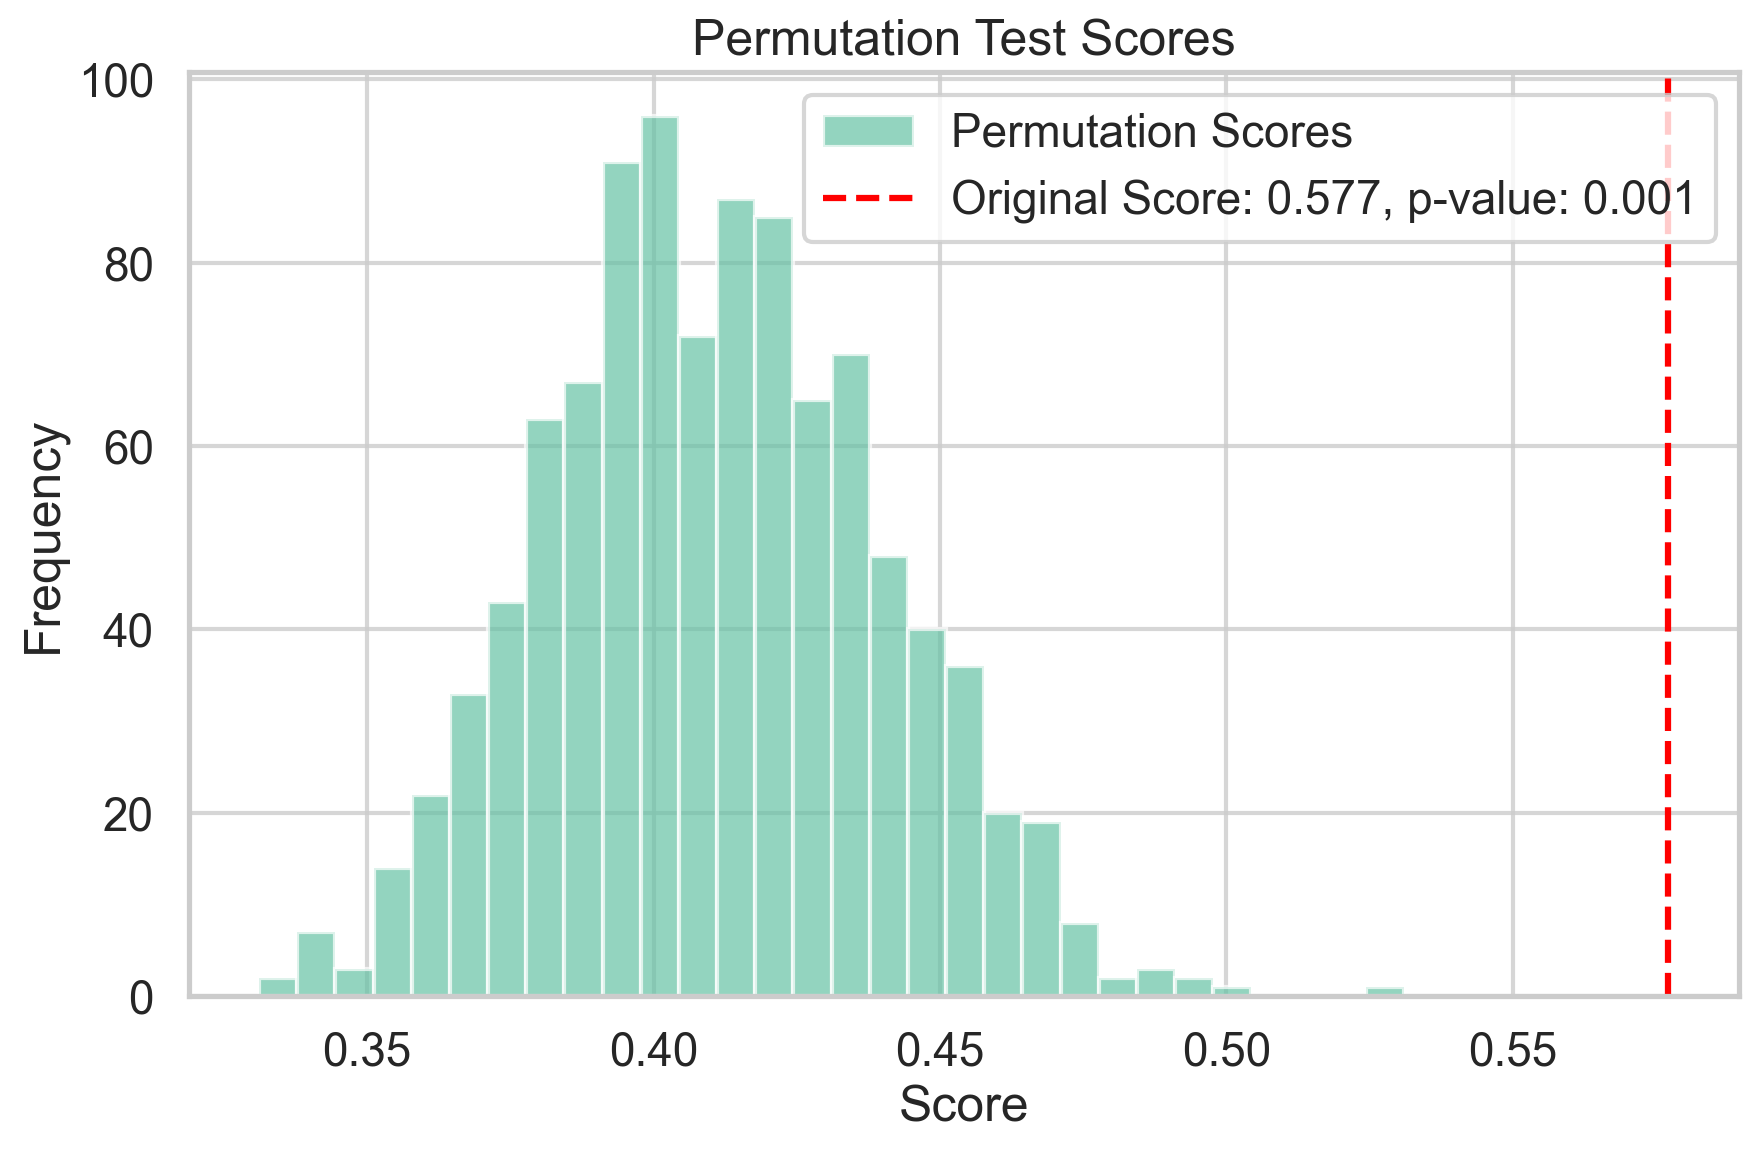

In [200]:
import matplotlib.pyplot as plt

metric = "ad"

scorer = "average_precision"

permutations_df = pd.read_csv(output_dir / metric / "permutations.csv")

permutations_df = permutations_df[permutations_df["scorer"] == scorer]

permutation_scores = permutations_df["permutation_score"].values
perm_score = permutations_df["score"].values[0]
pvalue = permutations_df["pvalue"].values[0]

plt.figure(figsize=(10, 6))
plt.hist(permutation_scores, bins=30, alpha=0.7, label="Permutation Scores")
plt.axvline(
    perm_score,
    color="red",
    linestyle="--",
    label=f"Original Score: {perm_score:.3f}, p-value: {pvalue:.3f}",
)
plt.title("Permutation Test Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [201]:
from tqdm import tqdm


def collect_feature_matrix(metrics_data: dict, roi: str):
    """
    Collect all metrics from a specific roi to a feature matrix.

    Parameters
    ----------
    metrics_data : dict
        A dictionary containing the metrics data.
    roi : str
        The region of interest.
    """
    return pd.DataFrame({metric: metrics_data[metric][roi] for metric in metrics_data.keys()})


# stacking
X_meta = pd.DataFrame(index=rel_pre.index, columns=parcels[region_col].astype(str).to_list())

# Choose model and define parameter grid(s)
base_estimator_name = "sgd"
base_estimator = ESTIMATORS[base_estimator_name]
base_param_grid = PARAM_GRIDS[base_estimator_name]
base_param_grid = {f"estimator__{key}": value for key, value in base_param_grid.items()}

base_pipeline = Pipeline(
    [
        ("scaler", scaler),  # StandardScaler for feature scaling
        # ("pca", pca),  # PCA for dimensionality reduction
        ("estimator", base_estimator),  # Base estimator (e.g., xgboost)
    ]
)

for i, row in tqdm(parcels.iterrows(), total=parcels.shape[0], desc="Processing Parcels"):
    # generate feature matrix for parcel i (all metrics)
    roi = row[region_col]

    roi_destination = output_dir / "stacked" / str(roi)
    roi_destination.mkdir(parents=True, exist_ok=True)

    # measure_fname = roi_destination / "measurements.csv"
    predictions_fname = roi_destination / "predictions.csv"
    # permutations_fname = roi_destination / "permutations.csv"

    if not FORCE and (
        predictions_fname.exists()
        # and measure_fname.exists() and and permutations_fname.exists()
    ):
        measure_df = pd.read_csv(measure_fname)
        predictions_df = pd.read_csv(predictions_fname)
        permutations_df = pd.read_csv(permutations_fname)
        X_meta[str(roi)] = predictions_df["proba"].values
        continue  # Skip if already processed

    X_roi = collect_feature_matrix(data, roi)
    # add covariates
    X_roi[cov_names["gm_vol"]] = rel_pre[cov_names["gm_vol"]]

    measure_df = df_template.copy()
    permutations_df = pd.DataFrame()
    predictions_df = predictions_template.copy()

    # break
    grid = GridSearchCV(
        base_pipeline,
        param_grid=base_param_grid,
        cv=outer_cv,
        scoring="average_precision",
        n_jobs=10,
        refit=True,
        verbose=0,
    )
    # Fit the model
    grid.fit(X_roi, y)
    model = grid.best_estimator_
    # for scorer in ["average_precision", "roc_auc", "f1"]:
    #     scores = cross_val_score(
    #         grid.best_estimator_, X_roi, y, cv=outer_cv, scoring=scorer, groups=groups, n_jobs=10
    #     )
    #     if scorer == "average_precision":
    #         print(f"{scorer} mean: {np.mean(scores)}, std: {np.std(scores)}")
    #     splits = outer_cv.split(X_roi, y, groups=groups)
    #     perm_score, permutation_scores, pvalue = permutation_test_score(
    #         grid.best_estimator_,
    #         X_roi,
    #         y,
    #         cv=splits,
    #         scoring=scorer,
    #         n_permutations=N_PERMUTATIONS,
    #         n_jobs=10,
    #     )
    #     # break
    #     for fold, score in enumerate(scores):
    #         measure_df.loc[len(measure_df)] = [
    #             scorer,
    #             fold,
    #             score,
    #         ]

    #     cur_permutations_df = permutations_df_template.copy()
    #     cur_permutations_df["scorer"] = scorer
    #     cur_permutations_df["permutation"] = np.arange(N_PERMUTATIONS)
    #     cur_permutations_df["score"] = perm_score
    #     cur_permutations_df["permutation_score"] = permutation_scores
    #     cur_permutations_df["pvalue"] = pvalue
    #     permutations_df = pd.concat([permutations_df, cur_permutations_df], ignore_index=True)

    y_pred_proba = cross_val_predict(
        model, X_roi, y, cv=outer_cv, n_jobs=10, method="predict_proba"
    )
    y_pred_proba = y_pred_proba[:, 1]
    X_meta[str(roi)] = y_pred_proba
    # break
    predictions_df["true"] = y
    predictions_df["proba"] = y_pred_proba

    # save to output
    # measure_df.to_csv(measure_fname, index=False)
    predictions_df.to_csv(predictions_fname, index=False)
    # permutations_df.to_csv(permutations_fname, index=False)

    # save model as pickle
    with open(roi_destination / "best_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # save X and y
    with open(roi_destination / "X.pkl", "wb") as f:
        pickle.dump(X_roi, f)
    with open(roi_destination / "y.pkl", "wb") as f:
        pickle.dump(y, f)
    # break

Processing Parcels: 100%|██████████| 454/454 [05:22<00:00,  1.41it/s]


In [202]:
stacked_destination = output_dir / "stacked"
stacked_destination.mkdir(parents=True, exist_ok=True)

measure_fname = stacked_destination / "measurements.csv"
predictions_fname = stacked_destination / "predictions.csv"
permutations_fname = stacked_destination / "permutations.csv"

if not FORCE and (
    measure_fname.exists() and predictions_fname.exists() and permutations_fname.exists()
):
    measure_df = pd.read_csv(measure_fname)
    predictions_df = pd.read_csv(predictions_fname)
    permutations_df = pd.read_csv(permutations_fname)
    with open(stacked_destination / "best_model.pkl", "rb") as f:
        model = pickle.load(f)
    with open(stacked_destination / "X.pkl", "rb") as f:
        X_meta = pickle.load(f)
    with open(stacked_destination / "y.pkl", "rb") as f:
        y = pickle.load(f)

else:

    measure_df = df_template.copy()
    permutations_df = pd.DataFrame()
    predictions_df = predictions_template.copy()

    # add covariates
    X_meta[cov_names["gm_vol"]] = rel_pre[cov_names["gm_vol"]]

    X_meta.columns = X_meta.columns.astype(str)  # Ensure all columns are strings for consistency

    # break
    grid = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=outer_cv,
        scoring="average_precision",
        n_jobs=10,
        refit=True,
        verbose=1,
    )
    # Fit the model
    grid.fit(X_meta, y)
    model = grid.best_estimator_
    for scorer in ["average_precision", "roc_auc", "f1"]:
        scores = cross_val_score(
            grid.best_estimator_, X_meta, y, cv=outer_cv, scoring=scorer, n_jobs=10
        )
        print(f"{scorer} mean: {np.mean(scores)}, std: {np.std(scores)}")
        splits = outer_cv.split(X_meta, y)
        perm_score, permutation_scores, pvalue = permutation_test_score(
            grid.best_estimator_,
            X_meta,
            y,
            cv=splits,
            scoring=scorer,
            n_permutations=N_PERMUTATIONS,
            n_jobs=10,
        )
        # break
        for fold, score in enumerate(scores):
            measure_df.loc[len(measure_df)] = [
                scorer,
                fold,
                score,
            ]

        cur_permutations_df = permutations_df_template.copy()
        cur_permutations_df["scorer"] = scorer
        cur_permutations_df["permutation"] = np.arange(N_PERMUTATIONS)
        cur_permutations_df["score"] = perm_score
        cur_permutations_df["permutation_score"] = permutation_scores
        cur_permutations_df["pvalue"] = pvalue
        permutations_df = pd.concat([permutations_df, cur_permutations_df], ignore_index=True)

    y_pred_proba = cross_val_predict(
        model, X_meta, y, cv=outer_cv, n_jobs=10, method="predict_proba"
    )
    y_pred_proba = y_pred_proba[:, 1]
    # break
    predictions_df["true"] = y
    predictions_df["proba"] = y_pred_proba

    # save to output
    measure_df.to_csv(stacked_destination / "measurements.csv", index=False)
    predictions_df.to_csv(stacked_destination / "predictions.csv", index=False)
    permutations_df.to_csv(stacked_destination / "permutations.csv", index=False)

    # save model as pickle
    with open(stacked_destination / "best_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # save X and y
    with open(stacked_destination / "X.pkl", "wb") as f:
        pickle.dump(X_meta, f)
    with open(stacked_destination / "y.pkl", "wb") as f:
        pickle.dump(y, f)
    # break

/tmp/ipykernel_2579039/3910074616.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_meta[cov_names["gm_vol"]] = rel_pre[cov_names["gm_vol"]]
/tmp/ipykernel_2579039/3910074616.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_meta[cov_names["gm_vol"]] = rel_pre[cov_names["gm_vol"]]
/tmp/ipykernel_2579039/3910074616.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

Fitting 10 folds for each of 60 candidates, totalling 600 fits
average_precision mean: 0.5475016705761007, std: 0.09953627179146396
roc_auc mean: 0.6738607147571173, std: 0.0611711845565521
f1 mean: 0.3371771278909103, std: 0.1232449533016503


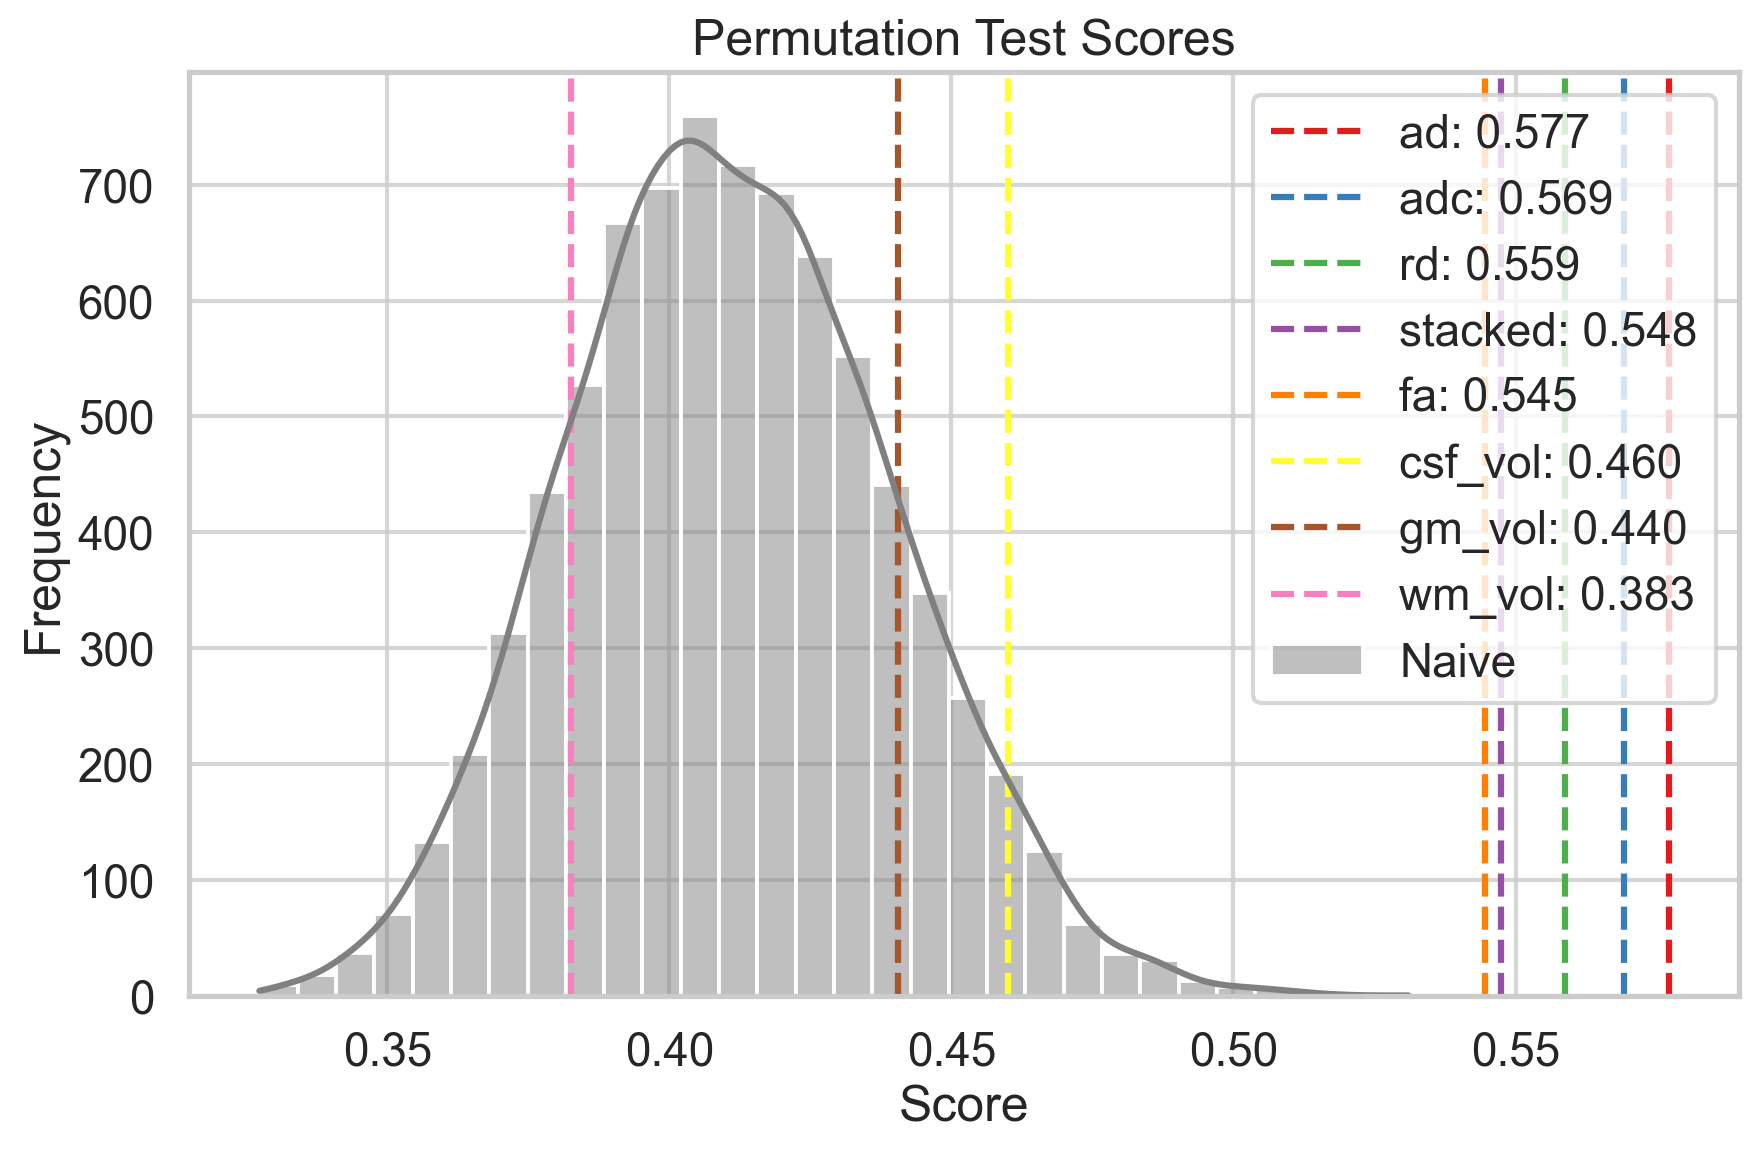

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from athletes_brain.fig1.config import savefig_nice

scorer = "average_precision"
fig, ax = plt.subplots(figsize=(10, 6))

# set color palette
colors = plt.get_cmap("Set1")

vis_df = pd.DataFrame()

for i, metric in enumerate(config.METRICS + ["stacked"]):

    permutations_df = pd.read_csv(output_dir / metric / "permutations.csv")

    permutations_df = permutations_df[permutations_df["scorer"] == scorer]

    permutation_scores = permutations_df["permutation_score"].values
    perm_score = permutations_df["score"].values[0]
    pvalue = permutations_df["pvalue"].values[0]
    vis_df = pd.concat(
        [
            vis_df,
            pd.DataFrame(
                {
                    "metric": metric,
                    "permutation_score": permutation_scores,
                    "score": perm_score,
                    "pvalue": pvalue,
                }
            ),
        ],
        ignore_index=True,
    )

vis_df = vis_df.sort_values("score", ascending=False)
permutation_scores = []
for i, metric in enumerate(vis_df["metric"].unique()):
    metric_permutation_scores = vis_df[vis_df["metric"] == metric]["permutation_score"].values
    permutation_scores += metric_permutation_scores.tolist()
    perm_score = vis_df[vis_df["metric"] == metric]["score"].values[0]
    ax.axvline(
        perm_score,
        color=colors(i),
        linestyle="--",
        label=f"{metric}: {perm_score:.3f}",
    )
sns.histplot(permutation_scores, bins=30, alpha=0.5, color="gray", label="Naive", kde=True)
ax.set_title("Permutation Test Scores")
ax.set_xlabel("Score")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()
# savefig_nice(fig, output_dir / "permutation_test_scores.png")

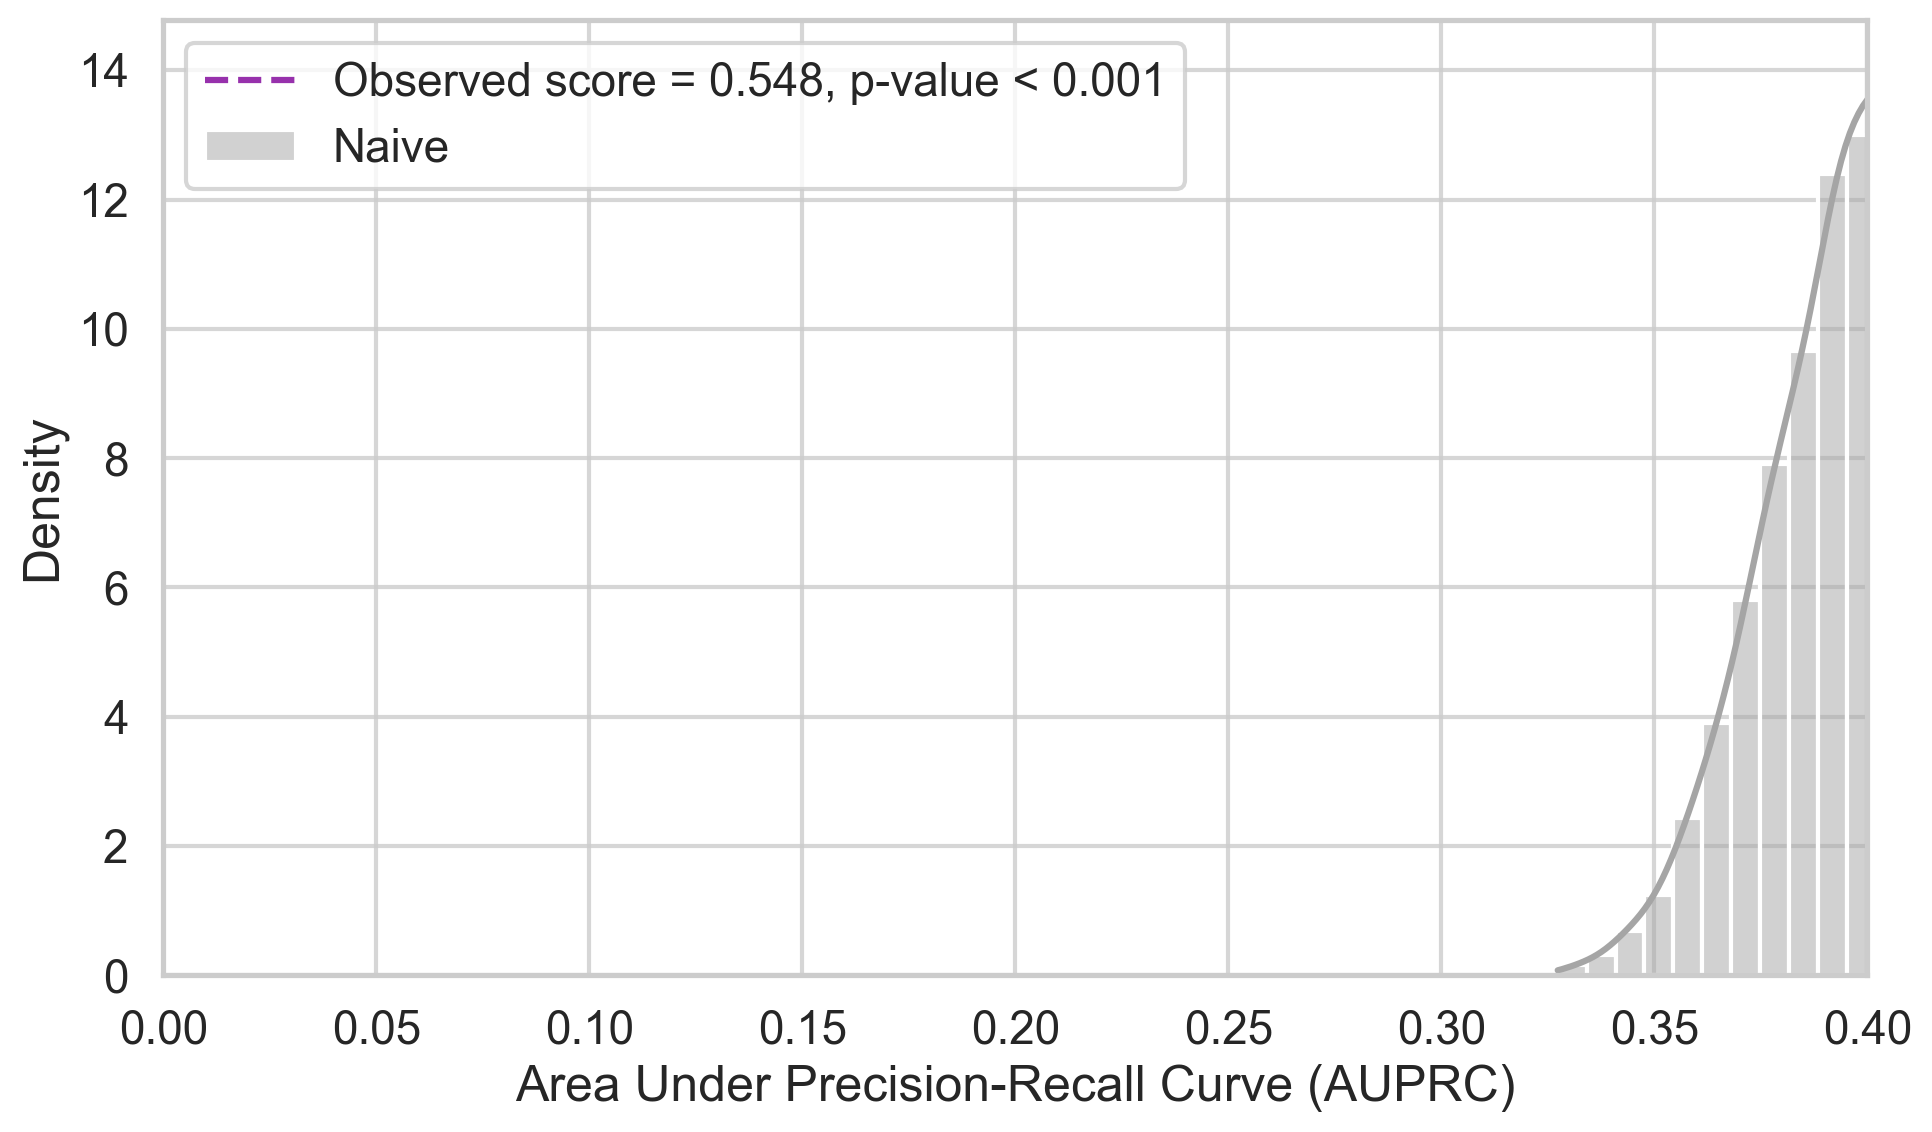

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
from athletes_brain.fig1.config import savefig_nice

scorer = "average_precision"
fig, ax = plt.subplots(figsize=(10, 6))

# set color palette
colors = plt.get_cmap("Set1")

metric_permutation_scores = vis_df[vis_df["metric"] == "stacked"]["permutation_score"].values
permutation_scores += metric_permutation_scores.tolist()
perm_score = vis_df[vis_df["metric"] == "stacked"]["score"].values[0]
ax.axvline(
    perm_score,
    color=config.COL_WEIGHTED,
    linestyle="--",
    label=f"Observed score = {perm_score:.3f}, p-value < {pvalue:.3f}",
)
sns.histplot(
    permutation_scores,
    bins=30,
    alpha=0.5,
    color=config.COL_CENSUS,
    label="Naive",
    kde=True,
    stat="density",
)
# ax.set_title("Permutation Test Scores")
ax.set_xlabel("Area Under Precision-Recall Curve (AUPRC)")
ax.set_ylabel("Density")
ax.legend()
ax.set_xlim(0, 0.4)
# plt.show()
savefig_nice(fig, output_dir / "permutation_test_scores.png")

In [ ]:
import matplotlib.pyplot as plt

# visualize
metrics = ["gm_vol", "adc"]
analysis_levels = [
    "athletes_vs_controls",
    "climbing_vs_controls",
    "bjj_vs_controls",
    "climbing_vs_bjj",
]
# analysis_levels = ["climbing_vs_bjj"]
value_column = "r_partial"
vmin = -5
vmax = 5

fdr_corrected = True
# sport = "all"
old_format = False

# for contrast in ["slope_learner_pre", "factor_learner_pre", "slope","slope_x_learner","factor","factor_x_learner","slope_interaction","factor_interaction","L_post","L_slope_month"]:
for contrast in ["slope_MvO", "factor_MvO", "slope_MvA", "factor_MvA"]:
    contrast_name = contrast.replace("_p", "_q") if old_format else contrast
    for sport in ["all", "climbing", "bjj"]:
        for metric in metrics:
            fdr_label = "fdr_corrected" if fdr_corrected else "uncorrected"
            # metric_dir = output_dir  / "passive" / sport / contrast / metric / fdr_label
            metric_dir = output_dir / sport / "passive" / metric / contrast / fdr_label
            metric_dir.mkdir(parents=True, exist_ok=True)
            vis_df = region_results[
                (region_results["metric"] == metric)
                & (region_results["sport_group"].str.lower() == sport)
            ]

            vis_config = Fig1Config()
            vis_config.VMIN = vmin
            vis_config.VMAX = vmax

            #     break
            # break
            plotter = BrainPlotter(vis_config)

            plotter.plot_single_metric(
                results_df=vis_df,
                metric_key=f"{metric}_{sport}_{contrast}",
                output_dir=metric_dir,
                p_column=f"{contrast_name}_q" if fdr_corrected else f"{contrast_name}_p",
                value_column=f"{contrast_name}_z",
            )
            plt.close("all")
            # break
        # break
    # break

2025-09-08 12:16:19.308 | INFO     | athletes_brain.fig1.brain_visualization:plot_single_metric:276 - Creating brain plots for gm_vol_all_slope_MvO
2025-09-08 12:16:19.308 | INFO     | athletes_brain.fig1.brain_visualization:setup_surfaces:30 - Setting up brain surfaces and parcellations
2025-09-08 12:16:19.314 | SUCCESS  | athletes_brain.fig1.brain_visualization:setup_surfaces:39 - Brain surfaces and parcellations loaded successfully
2025-09-08 12:16:19.314 | INFO     | athletes_brain.fig1.brain_visualization:prepare_value_maps:57 - Preparing value maps for slope_MvO_z
2025-09-08 12:16:19.346 | INFO     | athletes_brain.fig1.brain_visualization:prepare_value_maps:97 - Prepared maps with 200 LH, 200 RH, and 54 subcortical regions
2025-09-08 12:16:19.347 | INFO     | athletes_brain.fig1.brain_visualization:plot_cortical_surface:121 - Creating cortical surface plots
2025-09-08 12:16:19.360 | INFO     | athletes_brain.fig1.brain_visualization:plot_cortical_surface:143 - Plotting left hemi

In [2]:
import os
import datetime
from pathlib import Path

sport = "all"
fdr_label = "fdr_corrected"
contrast = "slope_MvO"
metric = "adc"

fname = "/media/storage/phd/athletes_brain/figures/learners/{sport}/passive/{metric}/{contrast}/{fdr_label}/left_{metric}_{sport}_{contrast}.png"
fname = fname.format(sport=sport, contrast=contrast, metric=metric, fdr_label=fdr_label)

cmd_template = "shotwell {fname}"

# print the name of the file, and when was created/modified
print("File to present:", fname)
creation_date = datetime.datetime.fromtimestamp(Path(fname).stat().st_ctime)
print("File created/modified:", creation_date)

os.system(cmd_template.format(fname=fname))

File to present: /media/storage/phd/athletes_brain/figures/learners/all/passive/adc/slope_MvO/fdr_corrected/left_adc_all_slope_MvO.png
File created/modified: 2025-09-07 19:05:16.447732
Cannot open display: 
Run “shotwell --help” to see a full list of available command line options.


0

In [13]:
raise NotImplementedError("Figure generation not implemented yet")

NotImplementedError: Figure generation not implemented yet

In [ ]:
import nibabel as nib
from nilearn import plotting

metric = "adc"
sport = "climbing"

contrast = "factor_interaction"

df_vis = region_results[
    (region_results["metric"] == metric) & (region_results["sport_group"].str.lower() == sport)
]
df_vis.index = parcels.index
# Load atlas

atlas = nib.load(nifti_matlab_path)
data = np.round(atlas.get_fdata())

# replace rois with the corresponding value
for i, row in tqdm(parcels.iterrows()):
    idx = int(row[config.REGION_COL])
    pval = df_vis.loc[i, f"{contrast}_p"]
    val = df_vis.loc[i, f"{contrast}_z"]
    data[data == idx] = val if pval < 0.05 else np.nan

atlas_mod = nib.Nifti1Image(data, atlas.affine, atlas.header)

0it [00:00, ?it/s]


KeyError: 'factor_interaction_p'

In [ ]:
df_vis[df_vis["network"] == "subcortex"].sort_values(by=[f"{contrast}_p"], ascending=True)

,index,name,base_name,Label Name,network,component,hemisphere,n_subjects,n_athlete,n_learner,...,factor_x_learner_q,factor_learner_pre_q,slope_q,slope_interaction_q,slope_x_learner_q,slope_learner_pre_q,L_post_q,L_slope_month_q,metric,sport_group
425,426,pGP-rh,pGP,"Pallidum, posterior part",subcortex,Pallidum,R,198.0,67.0,131.0,...,0.109804,0.985626,0.120333,0.074597,0.075120,0.992008,0.130408,0.098668,adc,Climbing
432,433,HIP-body-lh,HIP-body,Hippocampus body,subcortex,Hippocampus body,L,198.0,67.0,131.0,...,0.024224,0.974509,0.967618,0.362436,0.010147,0.992008,0.026438,0.015928,adc,Climbing
424,425,NAc-core-rh,NAc-core,"Nucleus Accumbens, core",subcortex,Nucleus Accumbens,R,198.0,67.0,131.0,...,0.110907,0.574613,0.939563,0.467511,0.034569,0.663593,0.120477,0.006392,adc,Climbing
444,445,CAU-DA-lh,CAU-DA,"Caudate, dorso-anterior part",subcortex,Caudate,L,198.0,67.0,131.0,...,0.126550,0.694173,0.664404,0.500765,0.072757,0.788771,0.133206,0.037997,adc,Climbing
405,406,HIP-body-rh,HIP-body,Hippocampus body,subcortex,Hippocampus body,R,198.0,67.0,131.0,...,0.064743,0.974509,0.999888,0.500765,0.033929,0.992008,0.100245,0.057774,adc,Climbing
417,418,CAU-DA-rh,CAU-DA,"Caudate, dorso-anterior part",subcortex,Caudate,R,198.0,67.0,131.0,...,0.247086,0.694173,0.890298,0.509660,0.089209,0.765082,0.246616,0.031395,adc,Climbing
410,411,THA-DAm-rh,THA-DAm,"Thalamus, medial dorso-anterior part",subcortex,Thalamus,R,198.0,67.0,131.0,...,0.440006,0.974509,0.890298,0.500765,0.175258,0.992008,0.545890,0.249843,adc,Climbing
400,401,HIP-head-m1-rh,HIP-head-m1,"Hippocampus head, medial division",subcortex,Hippocampus head,R,198.0,67.0,131.0,...,0.428481,0.552190,0.939563,0.509660,0.145071,0.546314,0.415047,0.141612,adc,Climbing
402,403,THA-VAip-rh,THA-VAip,"Thalamus, inferior ventro-anterior part, poste...",subcortex,Thalamus,R,198.0,67.0,131.0,...,0.760854,0.489701,0.149712,0.653727,0.620769,0.408107,0.734020,0.530592,adc,Climbing
431,432,HIP-head-l-lh,HIP-head-l,"Hippocampus head, lateral division",subcortex,Hippocampus head,L,198.0,67.0,131.0,...,0.087530,0.974509,0.951340,0.509660,0.010147,0.979259,0.133206,0.024046,adc,Climbing


/home/galkepler/Projects/athletes_brain/venv/lib/python3.12/site-packages/nilearn/plotting/img_plotting.py:1416: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  safe_get_data(stat_map_img, ensure_finite=True),


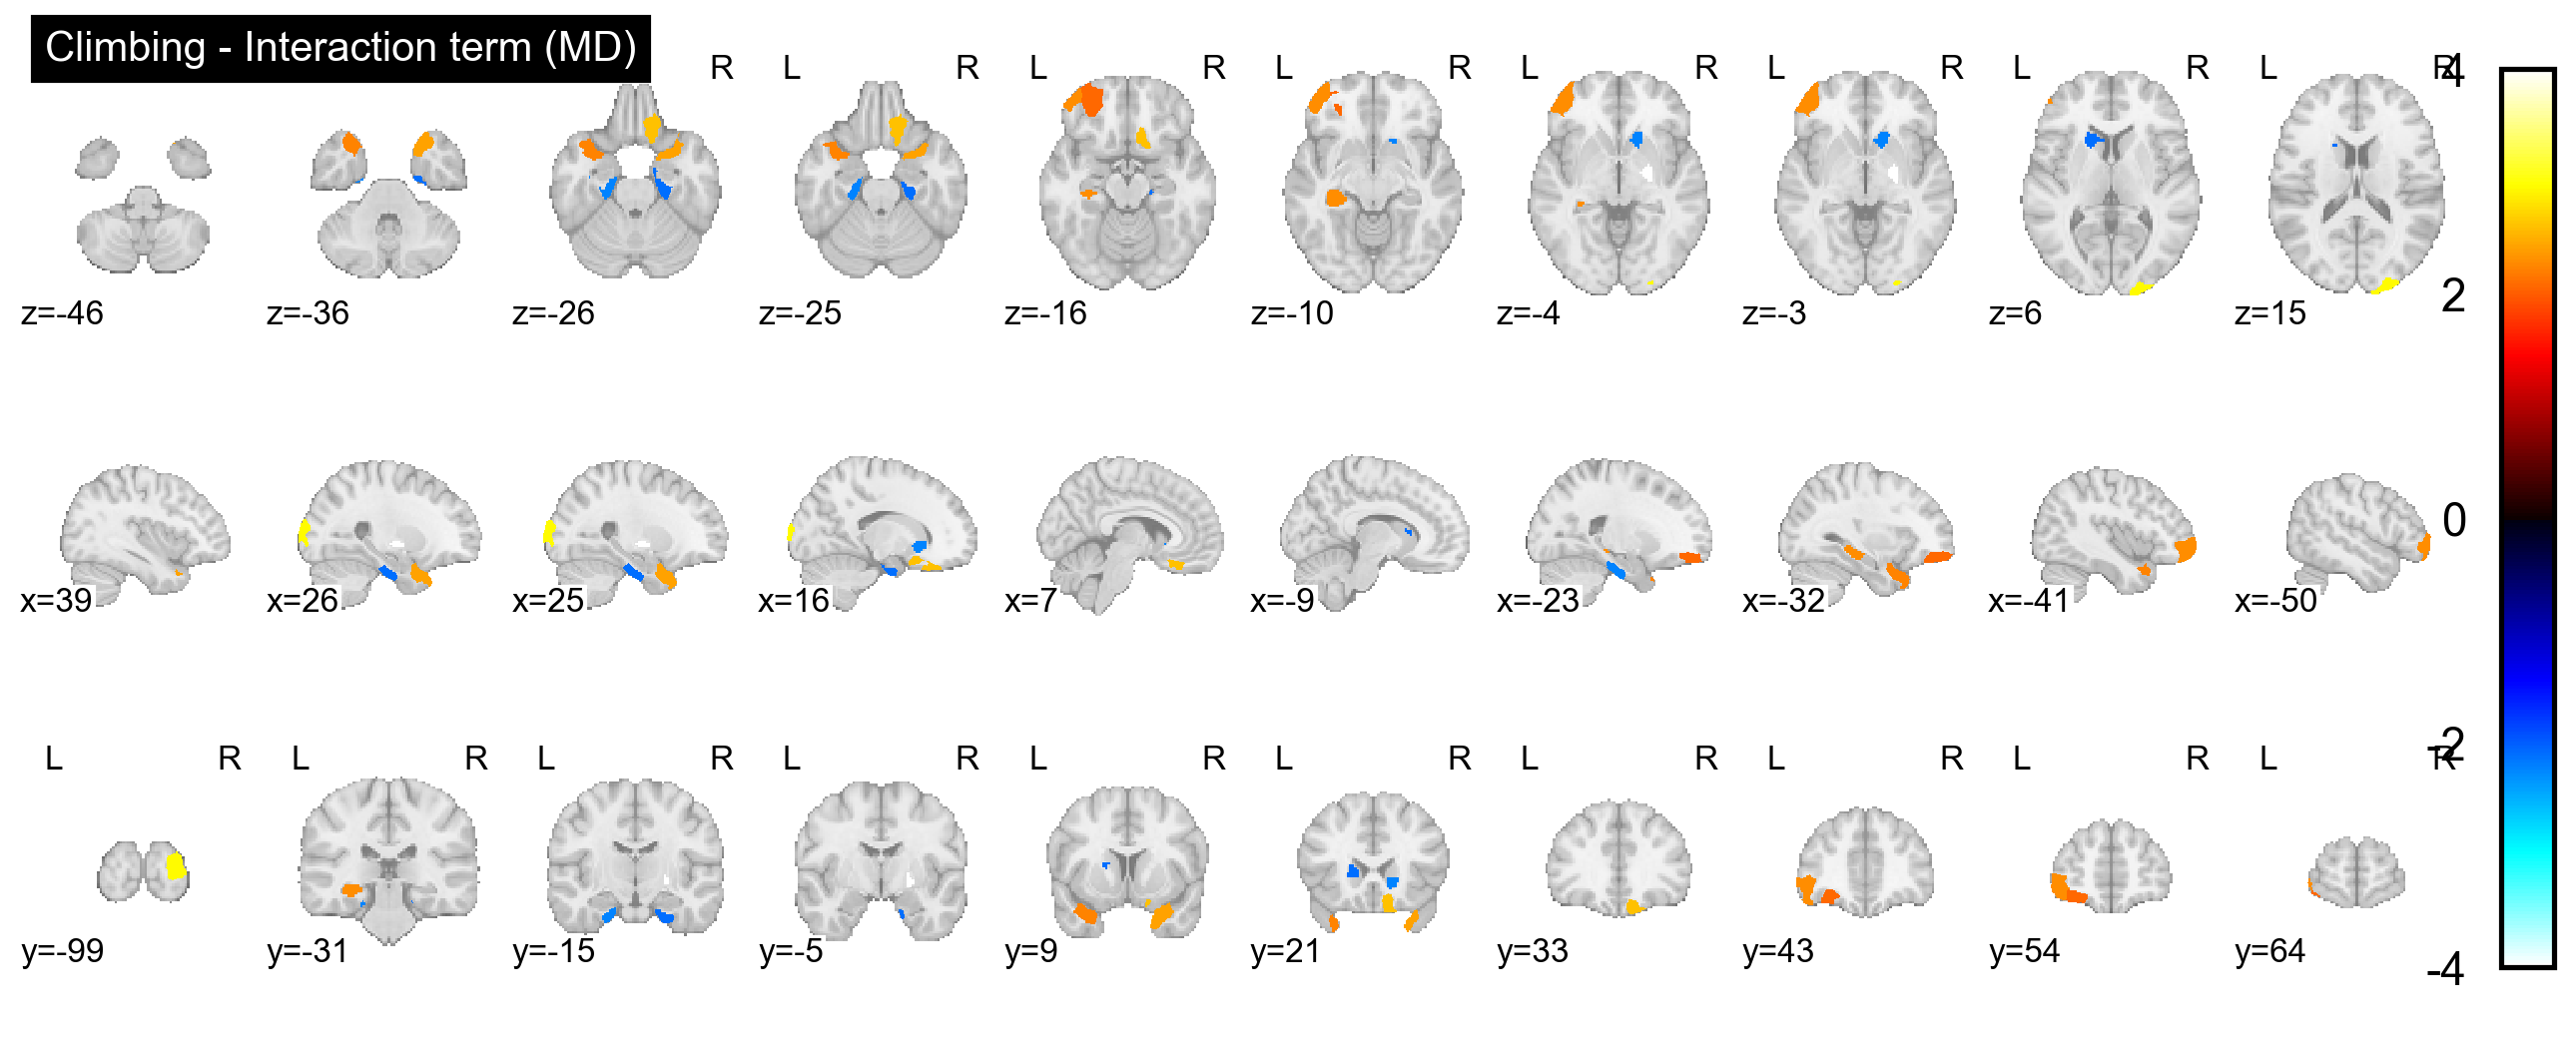

In [ ]:
plotting.plot_stat_map(
    atlas_mod,
    title="Climbing - Interaction term (MD)",
    threshold=0,
    display_mode="mosaic",
    cut_coords=10,
)

In [ ]:
from scipy.stats import ttest_1samp, ttest_rel

diff_results = {}

for metric, df in metric_data.items():
    diff_results[metric] = {}
    # if metric != "adc":
    #     continue
    for group in ["all", "Climbing", "Bjj"]:
        if group == "all":
            key = "athletes"
            group_df = df.copy()
        else:
            key = group.lower()
            group_df = df[df["group"] == group]
        cs_stats = output_dir.parent / "fig1" / metric / f"{key}_vs_controls" / "stats.csv"
        cs_stats = pd.read_csv(cs_stats)
        significant_rois = cs_stats[cs_stats["p_value_corrected"] < 0.05]
        diff_stats = parcels.copy()

        for i in significant_rois.index:
            roi_df = group_df[
                group_df[config.REGION_COL] == significant_rois.loc[i, config.REGION_COL]
            ]
            roi_df.loc[roi_df["subject_code"].str.contains("BJJC"), "condition"] = "Ccontrol"
            roi_df.loc[roi_df["subject_code"].str.contains("CLMC"), "condition"] = "Ccontrol"
            tidy = prepare_roi_longitudinal(roi_df, cfg)
            tidy = tidy[tidy["time_months"] < 12 * 2]
            d = tidy.loc[tidy["tp_label"].isin(["pre", "post"])].copy()
            d = d.loc[tidy["sport"].str.lower().isin(["bjj", "climbing"])].copy()
            has_both = d.groupby("subject_code")["tp_label"].transform(
                lambda s: {"pre", "post"}.issubset(set(s))
            )
            d = d[has_both].copy()
            d_before = d[d["tp_label"] == "pre"].set_index("subject_code")
            d_after = d[d["tp_label"] == "post"].set_index("subject_code")

            d_learners_before = d_before[d_before["condition"] == "Learner"]
            d_athletes_before = d_before[d_before["condition"] != "Learner"]
            d_learners_after = d_after[d_after["condition"] == "Learner"]
            d_athletes_after = d_after[d_after["condition"] != "Learner"]

            t, p = ttest_rel(
                d_learners_after["y"], d_learners_before.loc[d_learners_after.index, "y"]
            )
            diff_stats.loc[i, "t_learners"] = t
            diff_stats.loc[i, "p_learners"] = p
            t, p = ttest_rel(
                d_athletes_after["y"], d_athletes_before.loc[d_athletes_after.index, "y"]
            )
            diff_stats.loc[i, "t_athletes"] = t
            diff_stats.loc[i, "p_athletes"] = p

            # df_diff = d_after.copy()
            # df_diff["delta"] = df_diff["y"] - d_before["y"].values
            # df_diff["relative_delta"] = df_diff["delta"] / d_before["y"].values
            # df_diff["delta_days"] = (d_after["scan_dt"] - d_before["scan_dt"].values).dt.days

            # df_learners = df_diff[df_diff["condition"] == "Learner"]
            # df_athletes = df_diff[df_diff["condition"] != "Learner"]
            # t, p = ttest_1samp(df_learners["delta"], 0)
            # diff_stats.loc[i, "t_learner"] = t
            # diff_stats.loc[i, "p_learner"] = p
            # t, p = ttest_1samp(df_athletes["delta"], 0)
            # diff_stats.loc[i, "t_athlete"] = t
            # diff_stats.loc[i, "p_athlete"] = p
        for pcol in ["p_learners", "p_athletes"]:
            qcol = pcol.replace("p_", "q_")
            mask = diff_stats[pcol].notna()
            if mask.any():
                diff_stats.loc[mask, qcol] = multipletests(
                    diff_stats.loc[mask, pcol], method="fdr_bh"
                )[1]
        # multiple tests

        diff_results[metric][group.lower()] = diff_stats
        # break
    # break

In [ ]:
import nibabel as nib
from nilearn import plotting

metric = "gm_vol"
metric_vis = {"adc": "MD", "gm_vol": "GM Volume"}
sport = "all"
fdr_corrected = True

for sport in ["all", "climbing", "bjj"]:
    for cond in ["learners", "athletes"]:
        for metric in metrics:
            metric_dir = output_dir / sport / "athletes_guided" / metric / cond
            metric_dir.mkdir(parents=True, exist_ok=True)
            vis_df = diff_results[metric][sport.lower()]
            vis_df.index = parcels.index

            vis_config = Fig1Config()
            vis_config.VMIN = vmin
            vis_config.VMAX = vmax

            #     break
            # break
            plotter = BrainPlotter(vis_config)

            plotter.plot_single_metric(
                results_df=vis_df,
                metric_key=f"{metric}_{sport}_{cond}",
                output_dir=metric_dir,
                p_column=f"p_{cond}" if fdr_corrected else f"q_{cond}",
                value_column=f"t_{cond}",
            )
            plt.close("all")
    #         break
    #     break
    # break

2025-08-27 17:31:17.636 | INFO     | athletes_brain.fig1.brain_visualization:plot_single_metric:276 - Creating brain plots for gm_vol_all_learners
2025-08-27 17:31:17.636 | INFO     | athletes_brain.fig1.brain_visualization:setup_surfaces:30 - Setting up brain surfaces and parcellations
2025-08-27 17:31:17.639 | SUCCESS  | athletes_brain.fig1.brain_visualization:setup_surfaces:39 - Brain surfaces and parcellations loaded successfully
2025-08-27 17:31:17.640 | INFO     | athletes_brain.fig1.brain_visualization:prepare_value_maps:57 - Preparing value maps for t_learners
2025-08-27 17:31:17.659 | INFO     | athletes_brain.fig1.brain_visualization:prepare_value_maps:97 - Prepared maps with 200 LH, 200 RH, and 54 subcortical regions
2025-08-27 17:31:17.659 | INFO     | athletes_brain.fig1.brain_visualization:plot_cortical_surface:121 - Creating cortical surface plots
2025-08-27 17:31:17.671 | INFO     | athletes_brain.fig1.brain_visualization:plot_cortical_surface:143 - Plotting left hemisp

In [ ]:
raise

RuntimeError: No active exception to reraise

In [ ]:
vis_config = Fig1Config()

# cmaps = config.get_colormaps()
# cmap = cmaps["weighted"]
vis_config.COLORMAP = "coolwarm"

vis_config.VMIN = -3
vis_config.VMAX = 3
plotter = BrainPlotter(vis_config)

NameError: name 'Fig1Config' is not defined

In [ ]:
effect = "factor_interaction"
is_learner = effect.startswith("L")

plotter.plot_single_metric(
    results_df=stats,
    metric_key=effect,
    output_dir=output_dir,
    p_column=f"{effect}_p" if not is_learner else effect.replace("beta", "p"),
    value_column=f"{effect}_z" if not is_learner else effect.replace("beta", "z"),
)

: 